# Proposta: 

O seguinte trabalho tem como objetivo fazer uma análise exploratória e tentativa de estimação dos preços com daddos do air
bnb com os dados do Rio de Janeiro.

Importando as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Primeiro passo: primeiro fazer uma análise exploratória e tratar os dados que forem precisos:

In [2]:
dados_ = pd.read_csv('C:/Users/Manoel/Documents/Cognitivo/Teste Data_Science/input/listings_detalhado.csv')

In [3]:
dados_

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.04
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15
2,25026,https://www.airbnb.com/rooms/25026,20201025230850,2020-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,12,12,0,0,1.88
3,35636,https://www.airbnb.com/rooms/35636,20201025230850,2020-10-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.12
4,35764,https://www.airbnb.com/rooms/35764,20201025230850,2020-10-26,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24025,46041144,https://www.airbnb.com/rooms/46041144,20201025230850,2020-10-26,Great apartment in Leblon,NaN,NaN,https://a0.muscache.com/pictures/5391ed61-5eb4...,15671309,https://www.airbnb.com/users/show/15671309,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
24026,46045547,https://www.airbnb.com/rooms/46045547,20201025230850,2020-10-26,Excelente casa proximo Vila Militar,"Excelente casa, aconchegante próx. comércio, s...",NaN,https://a0.muscache.com/pictures/011e3554-6b75...,150142034,https://www.airbnb.com/users/show/150142034,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
24027,46045682,https://www.airbnb.com/rooms/46045682,20201025230850,2020-10-26,No Coração do Leblon ...Reveillon 2020,"Melhor localidade do Leblon, 3 quadras da prai...",NaN,https://a0.muscache.com/pictures/75d921a2-cf0a...,321974870,https://www.airbnb.com/users/show/321974870,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
24028,46047007,https://www.airbnb.com/rooms/46047007,20201025230850,2020-10-26,Aconchego em Ipanema,"Trata-se de um apartamento aconchegante, com m...",Ipanema é um baixo para quem procura desde uma...,https://a0.muscache.com/pictures/ac5589cd-bb7e...,131908016,https://www.airbnb.com/users/show/131908016,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [4]:
dados_.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.403000e+04,2.403000e+04,2.403000e+04,24022.000000,24022.000000,0.0,24030.000000,24030.000000,24030.000000,0.0,...,14667.000000,14672.000000,14667.000000,14669.000000,0.0,24030.000000,24030.000000,24030.000000,24030.000000,15249.000000
mean,2.294790e+07,2.020103e+13,9.017416e+07,7.758555,7.758555,NaN,-22.964936,-43.250611,4.145568,NaN,...,9.812095,9.773446,9.767437,9.305815,NaN,6.240117,5.315522,0.804744,0.086683,0.567877
std,1.461524e+07,1.925821e+00,9.730316e+07,28.127650,28.127650,NaN,0.035544,0.097310,2.513527,NaN,...,0.718164,0.777510,0.727296,1.029895,NaN,19.912067,19.438114,1.697502,0.609770,0.776404
min,1.787800e+04,2.020103e+13,1.173900e+04,0.000000,0.000000,NaN,-23.072970,-43.704790,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.123807e+07,2.020103e+13,1.390163e+07,1.000000,1.000000,NaN,-22.984450,-43.309283,2.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.100000
50%,2.114629e+07,2.020103e+13,5.596663e+07,2.000000,2.000000,NaN,-22.971050,-43.197455,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.240000
75%,3.832887e+07,2.020103e+13,1.265160e+08,4.000000,4.000000,NaN,-22.948310,-43.186510,5.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.730000
max,4.604803e+07,2.020103e+13,3.730634e+08,458.000000,458.000000,NaN,-22.749820,-43.104860,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,199.000000,194.000000,17.000000,11.000000,9.450000


In [5]:
dados_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24030 entries, 0 to 24029
Data columns (total 74 columns):
id                                              24030 non-null int64
listing_url                                     24030 non-null object
scrape_id                                       24030 non-null int64
last_scraped                                    24030 non-null object
name                                            24001 non-null object
description                                     22846 non-null object
neighborhood_overview                           13343 non-null object
picture_url                                     24030 non-null object
host_id                                         24030 non-null int64
host_url                                        24030 non-null object
host_name                                       24022 non-null object
host_since                                      24022 non-null object
host_location                                   23948 

Percentual de dados com Nan.

In [6]:
# porcentagem total de missing values - válido apenas para as quantitativas:
total = dados_.isnull().sum().sort_values(ascending=False)
percentual = (dados_.isnull().sum()/dados_.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
missing_data

,Total,Percentual
bathrooms,24030,100.000000
calendar_updated,24030,100.000000
neighbourhood_group_cleansed,24030,100.000000
license,24030,100.000000
host_about,11843,49.284228
...,...,...
longitude,0,0.000000
latitude,0,0.000000
calendar_last_scraped,0,0.000000
neighbourhood_cleansed,0,0.000000


Verificando a tabela acima, quatro colunas possuem apenas valores como nan's: bathrooms, calendar_updated, neighbourhood_group_cleansed e license. Dessas quatro colunas não há como extrair informações alguma. Já outras, também possuem alto índice de nan's, entre 40% e 50%, que são as seguintes: neighbourhood, neighborhood_overview e host_about. 

In [7]:
dados_['price'].describe()

count       24030
unique       1499
top       $250.00
freq          741
Name: price, dtype: object

A variável de interesse é o preço que está como string. A primeira coisa a se fazer é transformá-la em float, o que a função a seguir faz:

In [8]:
# Função que converte o preço (str) em float:

def convertendo_preco(dataframe):
    convert = []
    
    # remove o $ - cifrão - da string.
    for i in range(len(dataframe['price'])):
        convert.append(dataframe['price'][i][1:])
    
    # remove o , que é o indicador de mil.
    for j in range(len(convert)):
        if len(convert[j]) >= 6:
            for k in range(len(convert[j])):
                convert[j] = convert[j].replace(',',"")
    
    convert = list(np.float_(convert))
    return convert

In [9]:
dados_['price'] = convertendo_preco(dados_)

In [10]:
dados_['price'].describe()

count     24030.000000
mean        749.777070
std        5718.343929
min           0.000000
25%         150.000000
50%         263.000000
75%         550.000000
max      644121.000000
Name: price, dtype: float64

Plotando o gráfico de distribuição da variável preço:


 mu = 749.78 and sigma = 5718.22



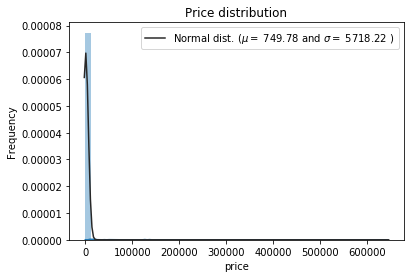

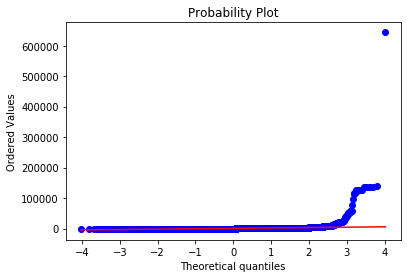

In [11]:
sns.distplot(dados_['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dados_['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(dados_['price'], plot=plt)
plt.show()

Algo chama atenção: A presença de alguns outliers. Um inclusive, bem distante dos demais valores observados. A seguir um sort de forma a observar melhor esses valores:

In [12]:
dados_['price'].sort_values(ascending = True)

23556         0.0
11756        32.0
9595         33.0
22071        34.0
10139        35.0
           ...   
23966    136267.0
23876    136267.0
22494    136267.0
18638    140498.0
8248     644121.0
Name: price, Length: 24030, dtype: float64

Como a variável de interesse é o preço e para fins de estimação, futuramente a variável será transformada em logaritmo, então será necessário dropar o valor em que o preço é zero - provavelmente foi algum erro. 

In [13]:
# dropando os preços que forem iguais a zero:
dados_ = dados_[(dados_[['price']] != 0).all(axis=1)]
dados_.reset_index(drop=True, inplace=True)
dados_['price'].sort_values(ascending = True)
dados_

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20201025230850,2020-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.04
1,21280,https://www.airbnb.com/rooms/21280,20201025230850,2020-10-26,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,This is the best neighborhood in Zona Sul. Fo...,https://a0.muscache.com/pictures/60851312/b22e...,81163,https://www.airbnb.com/users/show/81163,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.15
2,25026,https://www.airbnb.com/rooms/25026,20201025230850,2020-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,12,12,0,0,1.88
3,35636,https://www.airbnb.com/rooms/35636,20201025230850,2020-10-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.12
4,35764,https://www.airbnb.com/rooms/35764,20201025230850,2020-10-26,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24024,46041144,https://www.airbnb.com/rooms/46041144,20201025230850,2020-10-26,Great apartment in Leblon,NaN,NaN,https://a0.muscache.com/pictures/5391ed61-5eb4...,15671309,https://www.airbnb.com/users/show/15671309,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
24025,46045547,https://www.airbnb.com/rooms/46045547,20201025230850,2020-10-26,Excelente casa proximo Vila Militar,"Excelente casa, aconchegante próx. comércio, s...",NaN,https://a0.muscache.com/pictures/011e3554-6b75...,150142034,https://www.airbnb.com/users/show/150142034,...,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
24026,46045682,https://www.airbnb.com/rooms/46045682,20201025230850,2020-10-26,No Coração do Leblon ...Reveillon 2020,"Melhor localidade do Leblon, 3 quadras da prai...",NaN,https://a0.muscache.com/pictures/75d921a2-cf0a...,321974870,https://www.airbnb.com/users/show/321974870,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
24027,46047007,https://www.airbnb.com/rooms/46047007,20201025230850,2020-10-26,Aconchego em Ipanema,"Trata-se de um apartamento aconchegante, com m...",Ipanema é um baixo para quem procura desde uma...,https://a0.muscache.com/pictures/ac5589cd-bb7e...,131908016,https://www.airbnb.com/users/show/131908016,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [14]:
dados_['price'].sort_values(ascending = True)

11756        32.0
9595         33.0
22071        34.0
5024         35.0
22086        35.0
           ...   
23965    136267.0
22494    136267.0
23874    136267.0
18638    140498.0
8248     644121.0
Name: price, Length: 24029, dtype: float64

Pelo fato se existirem muitos outliers de preço, mas todos acima da média, a princípo optarei por excluir os imóveis com valores acima de R$ 2.000,00. Um dos objetivos futuros é melhorar o tratamento desses outliers.

In [15]:
# pela presença de alguns outliers, optei por trabalhar apenas com valores acima de R$ > 2.000,00
price_drop = dados_[(dados_['price'] <= 2000)]
price_drop.reset_index(drop=True, inplace=True)

In [16]:
price_drop['price'].describe()

count    22955.000000
mean       395.113439
std        385.252000
min         32.000000
25%        149.000000
50%        250.000000
75%        500.000000
max       2000.000000
Name: price, dtype: float64


 mu = 395.11 and sigma = 385.24



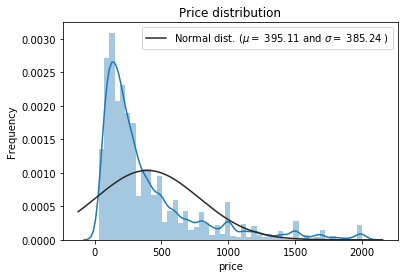

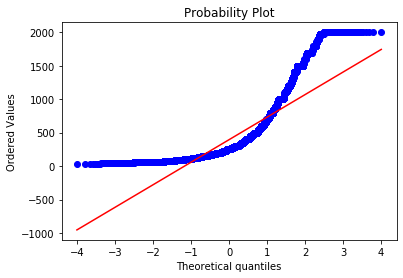

In [17]:
# plotando os preços e a distribuição após o drop.

sns.distplot(price_drop['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(price_drop['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(price_drop['price'], plot=plt)
plt.show()

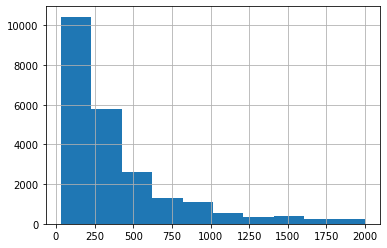

In [18]:
### Lets plot histogram for prices less than 2000
hist_price1=price_drop['price'].hist()

O histograma chama atenção por ser bem assimétrico. Conforme a faixa de preço aumenta, a quantidade de imóveis diminui de forma exponencial, indicando que boa parte dos imóveis ofertados estão no valor abaixo de R$ 500,00.
Quando olhando para o resultado do describe, ele reafirma as informações do histograma:
- a mediana foi de 250,00, ou seja, 50% dos valores estão abaixo de 250.
- 75% das observações estão abaixo do valor de 500,00.

Ou seja, os percentis mostram o como o preço é desbalanceado tendo 75% dos imóveis com valor de até 750,00.

O próximo passo é separar o dataframe em dois: nas variáveis que já estão como object e as que não, de forma a ajustar as que
estão como objetct como categóricas ou transformar em númericas aquelas que estão como string.
Além disso, determinar quais variáveis podem sem revelantes para o modelo e excluir aquelas que não seriam.

In [19]:
# verificando as variáveis categóricas
categorical_features = list(price_drop.select_dtypes(include=['object']).columns)
print("variáveis categóricas : " + str(len(categorical_features)))
categorical_features

variáveis categóricas : 32


['listing_url',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'instant_bookable']

In [20]:
# variáveis numéricas
numerical_features = list(price_drop.select_dtypes(exclude = ["object"]).columns)
print("variáveis numéricas : " + str(len(numerical_features)))
numerical_features

variáveis numéricas : 42


['id',
 'scrape_id',
 'host_id',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

# Variáveis categóricas:

Após separar as variáveis entre categóricas e númericas, a ideia é trabalhar cada uma delas. Assim, as categóricas serão transformadas em dummies ou retransformadas em numéricas. O objetivo é preparar os dados para a modelagem. Assim, as variáveis tradas nessa seção serão as seguintes:

- host_response_rate - é de se esperar que se o host tem uma boa taxa de respostas, seu imóvel seja mais locado e consequentemente tenha um preço maior.
- superhost e identity - ambos oferecem maior segurança ao locatário e faz com que o mesmo possa estar disposto a pagar mais.
- neighbourhood_cleansed - bairro da locação. É de se esperar que alguns sejam áeas mais nobres e afetem diretamente os preços.
- room_type - tipo de quarto também afeta diretamente o preço. É de se esperar que apartamentos inteiros sejam mais caros que quartos privados.
- bathrooms_text - quantidade de banheiros afeta também o preço. É de se eperar que apartamentos com mais banheiros sejam mais caros.

a partir desse seleção, exceto host_response_rate e bathrooms_text foram tranformadas em dummies.

In [21]:
limpando_cat = price_drop[categorical_features]
dados_categoricos = limpando_cat.drop(['listing_url', 'last_scraped', 'name', 'neighborhood_overview', 'picture_url', 'host_url',
                   'host_since', 'host_location', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review',
                   'description', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_acceptance_rate',
                   'host_has_profile_pic', 'neighbourhood', 'host_has_profile_pic', 'host_response_time', 'host_verifications',
                   'property_type', 'host_neighbourhood'], axis = 1)
dados_categoricos.reset_index(drop=True, inplace=True)
dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable
0,100%,t,t,Copacabana,Entire home/apt,1 bath,t,t
1,100%,f,t,Ipanema,Entire home/apt,2 baths,t,f
2,100%,f,t,Copacabana,Entire home/apt,1 bath,t,f
3,100%,f,t,Ipanema,Entire home/apt,1.5 baths,t,f
4,93%,t,t,Copacabana,Entire home/apt,1 bath,t,f
...,...,...,...,...,...,...,...,...
22950,100%,f,t,Leblon,Entire home/apt,1 bath,t,f
22951,100%,f,t,Padre Miguel,Entire home/apt,1 bath,t,t
22952,100%,f,t,Leblon,Entire home/apt,2 baths,t,f
22953,NaN,f,f,Ipanema,Entire home/apt,1 bath,t,t


In [22]:
dados_categoricos.isnull().sum(axis = 0)

host_response_rate        7211
host_is_superhost            7
host_identity_verified       7
neighbourhood_cleansed       0
room_type                    0
bathrooms_text              62
has_availability             0
instant_bookable             0
dtype: int64

In [23]:
# função que transforma as variáveis host_is_superhost, host_identity_verified e instant_bookable em dummies.

def gerando_dummies(subconjunto):
    for i in range(len(subconjunto)):
        if subconjunto[i] == 't':
            subconjunto[i] = 1
        else:
            subconjunto[i] = 0
    return subconjunto

In [24]:
# transformando as colunas que possuem t ou f em dummies (0 ou 1):
gerando_dummies(dados_categoricos['host_is_superhost'])
gerando_dummies(dados_categoricos['host_identity_verified'])
gerando_dummies(dados_categoricos['instant_bookable'])
gerando_dummies(dados_categoricos['has_availability'])

dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,bathrooms_text,has_availability,instant_bookable
0,100%,1,1,Copacabana,Entire home/apt,1 bath,1,1
1,100%,0,1,Ipanema,Entire home/apt,2 baths,1,0
2,100%,0,1,Copacabana,Entire home/apt,1 bath,1,0
3,100%,0,1,Ipanema,Entire home/apt,1.5 baths,1,0
4,93%,1,1,Copacabana,Entire home/apt,1 bath,1,0
...,...,...,...,...,...,...,...,...
22950,100%,0,1,Leblon,Entire home/apt,1 bath,1,0
22951,100%,0,1,Padre Miguel,Entire home/apt,1 bath,1,1
22952,100%,0,1,Leblon,Entire home/apt,2 baths,1,0
22953,NaN,0,0,Ipanema,Entire home/apt,1 bath,1,1


In [25]:
"""
como algumas colunas do bathrooms_text está apenas como texto, então essa célila transforma todas as linhas que são
apenas texto com a quantidade de banheiro em número como as demais:
"""
for i in range(len(dados_categoricos['bathrooms_text'])):
    if dados_categoricos['bathrooms_text'][i] == 'Private half-bath':
        dados_categoricos['bathrooms_text'][i] = '1 private bath'
    elif dados_categoricos['bathrooms_text'][i] == 'Half-bath':
        dados_categoricos['bathrooms_text'][i] = '0.5 bath'
    elif dados_categoricos['bathrooms_text'][i] == 'Shared half-bath':
        dados_categoricos['bathrooms_text'][i] = '0.5 bath'

Como algumas variáveis de interesse estão como string, o próximo passo é transformá-las em float ou int.

In [26]:
# fazendo replace dos nan por 0 nas colunas host_response_rate e bathrooms_text

dados_categoricos['host_response_rate'] = dados_categoricos['host_response_rate'].replace(np.nan, '0%')
dados_categoricos['bathrooms_text'] = dados_categoricos['bathrooms_text'].replace(np.nan, '0 baths')

In [27]:
# função que reesescreve as variáveis textuais em float:

def reescrevendo(subconjunto):
    lista_f = []
    num = set('0123456789.')
    for i in range(len(subconjunto)):
        x = (subconjunto[i])
        lista = []
        for j in range(len(subconjunto[i])):            
            if subconjunto[i][j] in num:
                lista.append(subconjunto[i][j])
        lista_f.append(''.join(lista))
     
    return lista_f

In [28]:
# reescrevendo as variáveis que estão como string em float ou int.

dados_categoricos['bathrooms_text'] = reescrevendo(dados_categoricos['bathrooms_text'])
dados_categoricos['host_response_rate'] = reescrevendo(dados_categoricos['host_response_rate'])
dados_categoricos['host_response_rate'] = dados_categoricos['host_response_rate'].astype(float)
dados_categoricos['host_response_rate'] = dados_categoricos['host_response_rate']/100

In [29]:
# fazer um cluster dos bairros, separando em zona sul, barra/jpa e outros. O bairro certamente é fundamental no preço do imóvel.

zona_sul = ['Ipanema', 'Copacabana', 'Flamengo', 'Gávea', 'Leblon', 'Laranjeiras', 'Humaitá', 'Lagoa', 'Jardim Botânico',
           'Leme', 'Leme', 'Urca', 'Alto da Boa Vista']

barra_jpa = ['Jacarepaguá', 'Barra da Tijuca', 'São Conrado', 'Recreio dos Bandeirantes', 'Vargem Grande', 'Vargem Pequena',
            'Taquara', 'Barra de Guaratiba']

In [30]:
dados_categoricos = dados_categoricos.assign(zona_sul = 0 ,barra_jpa = 0, outros_bairros = 0)

In [31]:
# separando os bairros por cluster
for i in range(len(dados_categoricos['neighbourhood_cleansed'])):
    if dados_categoricos['neighbourhood_cleansed'][i] in zona_sul:
        dados_categoricos['zona_sul'][i] = 1
    elif dados_categoricos['neighbourhood_cleansed'][i] in barra_jpa:
        dados_categoricos['barra_jpa'][i] = 1
    else:
        dados_categoricos['outros_bairros'][i] = 1

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
# dropando a coluna dos bairros após o cluster
#dados_categoricos = dados_categoricos.drop(['neighbourhood_cleansed'], axis = 1)
# separando os bairros por cluster
for i in range(len(dados_categoricos['neighbourhood_cleansed'])):
    if dados_categoricos['neighbourhood_cleansed'][i] in zona_sul:
        dados_categoricos['neighbourhood_cleansed'][i] = 'zona_sul'
    elif dados_categoricos['neighbourhood_cleansed'][i] in barra_jpa:
        dados_categoricos['neighbourhood_cleansed'][i] = 'barra_jpa'
    else:
        dados_categoricos['neighbourhood_cleansed'][i] = 'outros_bairros'

C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Manoel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
dados_categoricos['neighbourhood_cleansed']

0              zona_sul
1              zona_sul
2              zona_sul
3              zona_sul
4              zona_sul
              ...      
22950          zona_sul
22951    outros_bairros
22952          zona_sul
22953          zona_sul
22954         barra_jpa
Name: neighbourhood_cleansed, Length: 22955, dtype: object

In [32]:
# gerando as dummies a partir do tipo de quarto:
dados_categoricos = pd.get_dummies(dados_categoricos, columns=["room_type"], prefix=["Tipo_Quarto"])

In [59]:
dados_categoricos

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,bathrooms_text,has_availability,instant_bookable,zona_sul,barra_jpa,outros_bairros,Tipo_Quarto_Entire home/apt,Tipo_Quarto_Hotel room,Tipo_Quarto_Private room,Tipo_Quarto_Shared room
0,1.00,1,1,zona_sul,1,1,1,1,0,0,1,0,0,0
1,1.00,0,1,zona_sul,2,1,0,1,0,0,1,0,0,0
2,1.00,0,1,zona_sul,1,1,0,1,0,0,1,0,0,0
3,1.00,0,1,zona_sul,1.5,1,0,1,0,0,1,0,0,0
4,0.93,1,1,zona_sul,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,1.00,0,1,zona_sul,1,1,0,1,0,0,1,0,0,0
22951,1.00,0,1,outros_bairros,1,1,1,0,0,1,1,0,0,0
22952,1.00,0,1,zona_sul,2,1,0,1,0,0,1,0,0,0
22953,0.00,0,0,zona_sul,1,1,1,1,0,0,1,0,0,0


# Variáveis numéricas:

In [60]:
limpando_num = price_drop[numerical_features]
dados_numericos = limpando_num.drop(['id', 'scrape_id', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms', 'license',
                  'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                  'host_id', 'host_total_listings_count', 'minimum_minimum_nights', 'calculated_host_listings_count',
                  'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                  'number_of_reviews_l30d', 'minimum_nights_avg_ntm', 'calendar_updated', 'maximum_nights_avg_ntm',
                  'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm'], axis = 1)
dados_numericos.reset_index(drop=True, inplace=True)

a seguir o detalhamento da escolha de cada variável:
accommodates, bedrooms, beds: dá uma ideia do tamanho da locação, se o quarto é individual ou não (é de se esperar que um quarto individual seja mais caro que um compartilhado) ou não e acaba afetando o preço.
todos os review: dá uma ideia da avaliação geral da experiência e segurança a quem for locar.

In [61]:
dados_numericos.describe()

,host_listings_count,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,reviews_per_month
count,22948.000000,22955.000000,21442.000000,22723.000000,22955.000000,22955.000000,22955.000000,14451.000000,14439.000000,14442.000000,14440.000000,14445.000000,14440.000000,14442.000000,22955.000000,15002.000000
mean,7.352798,3.991157,1.623309,2.452537,395.113439,4.684034,12.566195,94.733513,9.656486,9.412547,9.813573,9.774386,9.769044,9.309652,5.105729,0.573756
std,27.227911,2.333627,0.940427,1.975374,385.252000,18.173591,29.880428,9.301139,0.891471,1.086968,0.715995,0.777867,0.724200,1.027805,19.216409,0.780492
min,0.000000,1.000000,1.000000,0.000000,32.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.010000
25%,1.000000,2.000000,1.000000,1.000000,149.000000,1.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.100000
50%,2.000000,4.000000,1.000000,2.000000,250.000000,2.000000,2.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.240000
75%,4.000000,5.000000,2.000000,3.000000,500.000000,4.000000,10.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,0.750000
max,458.000000,16.000000,30.000000,50.000000,2000.000000,730.000000,423.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,194.000000,9.450000


In [62]:
dados_numericos.isnull().sum(axis = 0)

host_listings_count                               7
accommodates                                      0
bedrooms                                       1513
beds                                            232
price                                             0
minimum_nights                                    0
number_of_reviews                                 0
review_scores_rating                           8504
review_scores_accuracy                         8516
review_scores_cleanliness                      8513
review_scores_checkin                          8515
review_scores_communication                    8510
review_scores_location                         8515
review_scores_value                            8513
calculated_host_listings_count_entire_homes       0
reviews_per_month                              7953
dtype: int64

Como algumas linhas dessas colunas estão como missing values, tais valores serão substituidos pelas suas respectivas médias.

In [63]:
# faz a média para depois substituir os nan
mean_host_listings_count = math.floor(dados_numericos['host_listings_count'].mean())
mean_accommodates = math.floor(dados_numericos['accommodates'].mean())
mean_bedrooms = math.floor(dados_numericos['bedrooms'].mean())
mean_beds = math.floor(dados_numericos['beds'].mean())
mean_price = math.floor(dados_numericos['price'].mean())
mean_minimum_nights = math.floor(dados_numericos['minimum_nights'].mean())
mean_number_of_reviews = math.floor(dados_numericos['number_of_reviews'].mean())
mean_review_scores_rating = math.floor(dados_numericos['review_scores_rating'].mean())
mean_review_scores_accuracy = math.floor(dados_numericos['review_scores_accuracy'].mean())
mean_review_scores_cleanliness = math.floor(dados_numericos['review_scores_cleanliness'].mean())
mean_review_scores_checkin = math.floor(dados_numericos['review_scores_checkin'].mean())
mean_review_scores_communication = math.floor(dados_numericos['review_scores_communication'].mean())
mean_review_scores_location = math.floor(dados_numericos['review_scores_location'].mean())
mean_review_scores_value = math.floor(dados_numericos['review_scores_value'].mean())
mean_review_scores_calculated_host_listings_count_entire_homes = math.floor(dados_numericos['calculated_host_listings_count_entire_homes'].mean())
mean_review_reviews_per_month = dados_numericos['reviews_per_month'].mean()

In [64]:
# substitui os nan pela média
dados_numericos.update(dados_numericos['host_listings_count'].fillna(mean_host_listings_count))
dados_numericos.update(dados_numericos['accommodates'].fillna(mean_accommodates))
dados_numericos.update(dados_numericos['bedrooms'].fillna(mean_bedrooms))
dados_numericos.update(dados_numericos['beds'].fillna(mean_beds))
dados_numericos.update(dados_numericos['price'].fillna(mean_price))
dados_numericos.update(dados_numericos['minimum_nights'].fillna(mean_minimum_nights))
dados_numericos.update(dados_numericos['number_of_reviews'].fillna(mean_number_of_reviews))
dados_numericos.update(dados_numericos['review_scores_rating'].fillna(mean_review_scores_rating))
dados_numericos.update(dados_numericos['review_scores_accuracy'].fillna(mean_review_scores_accuracy))
dados_numericos.update(dados_numericos['review_scores_cleanliness'].fillna(mean_review_scores_cleanliness))
dados_numericos.update(dados_numericos['review_scores_checkin'].fillna(mean_review_scores_checkin))
dados_numericos.update(dados_numericos['review_scores_communication'].fillna(mean_review_scores_communication))
dados_numericos.update(dados_numericos['review_scores_location'].fillna(mean_review_scores_location))
dados_numericos.update(dados_numericos['review_scores_value'].fillna(mean_review_scores_value))
dados_numericos.update(dados_numericos['calculated_host_listings_count_entire_homes'].fillna(mean_review_scores_calculated_host_listings_count_entire_homes))
dados_numericos.update(dados_numericos['reviews_per_month'].fillna(mean_review_reviews_per_month))

In [65]:
dados_numericos.isnull().sum(axis = 0)

host_listings_count                            0
accommodates                                   0
bedrooms                                       0
beds                                           0
price                                          0
minimum_nights                                 0
number_of_reviews                              0
review_scores_rating                           0
review_scores_accuracy                         0
review_scores_cleanliness                      0
review_scores_checkin                          0
review_scores_communication                    0
review_scores_location                         0
review_scores_value                            0
calculated_host_listings_count_entire_homes    0
reviews_per_month                              0
dtype: int64

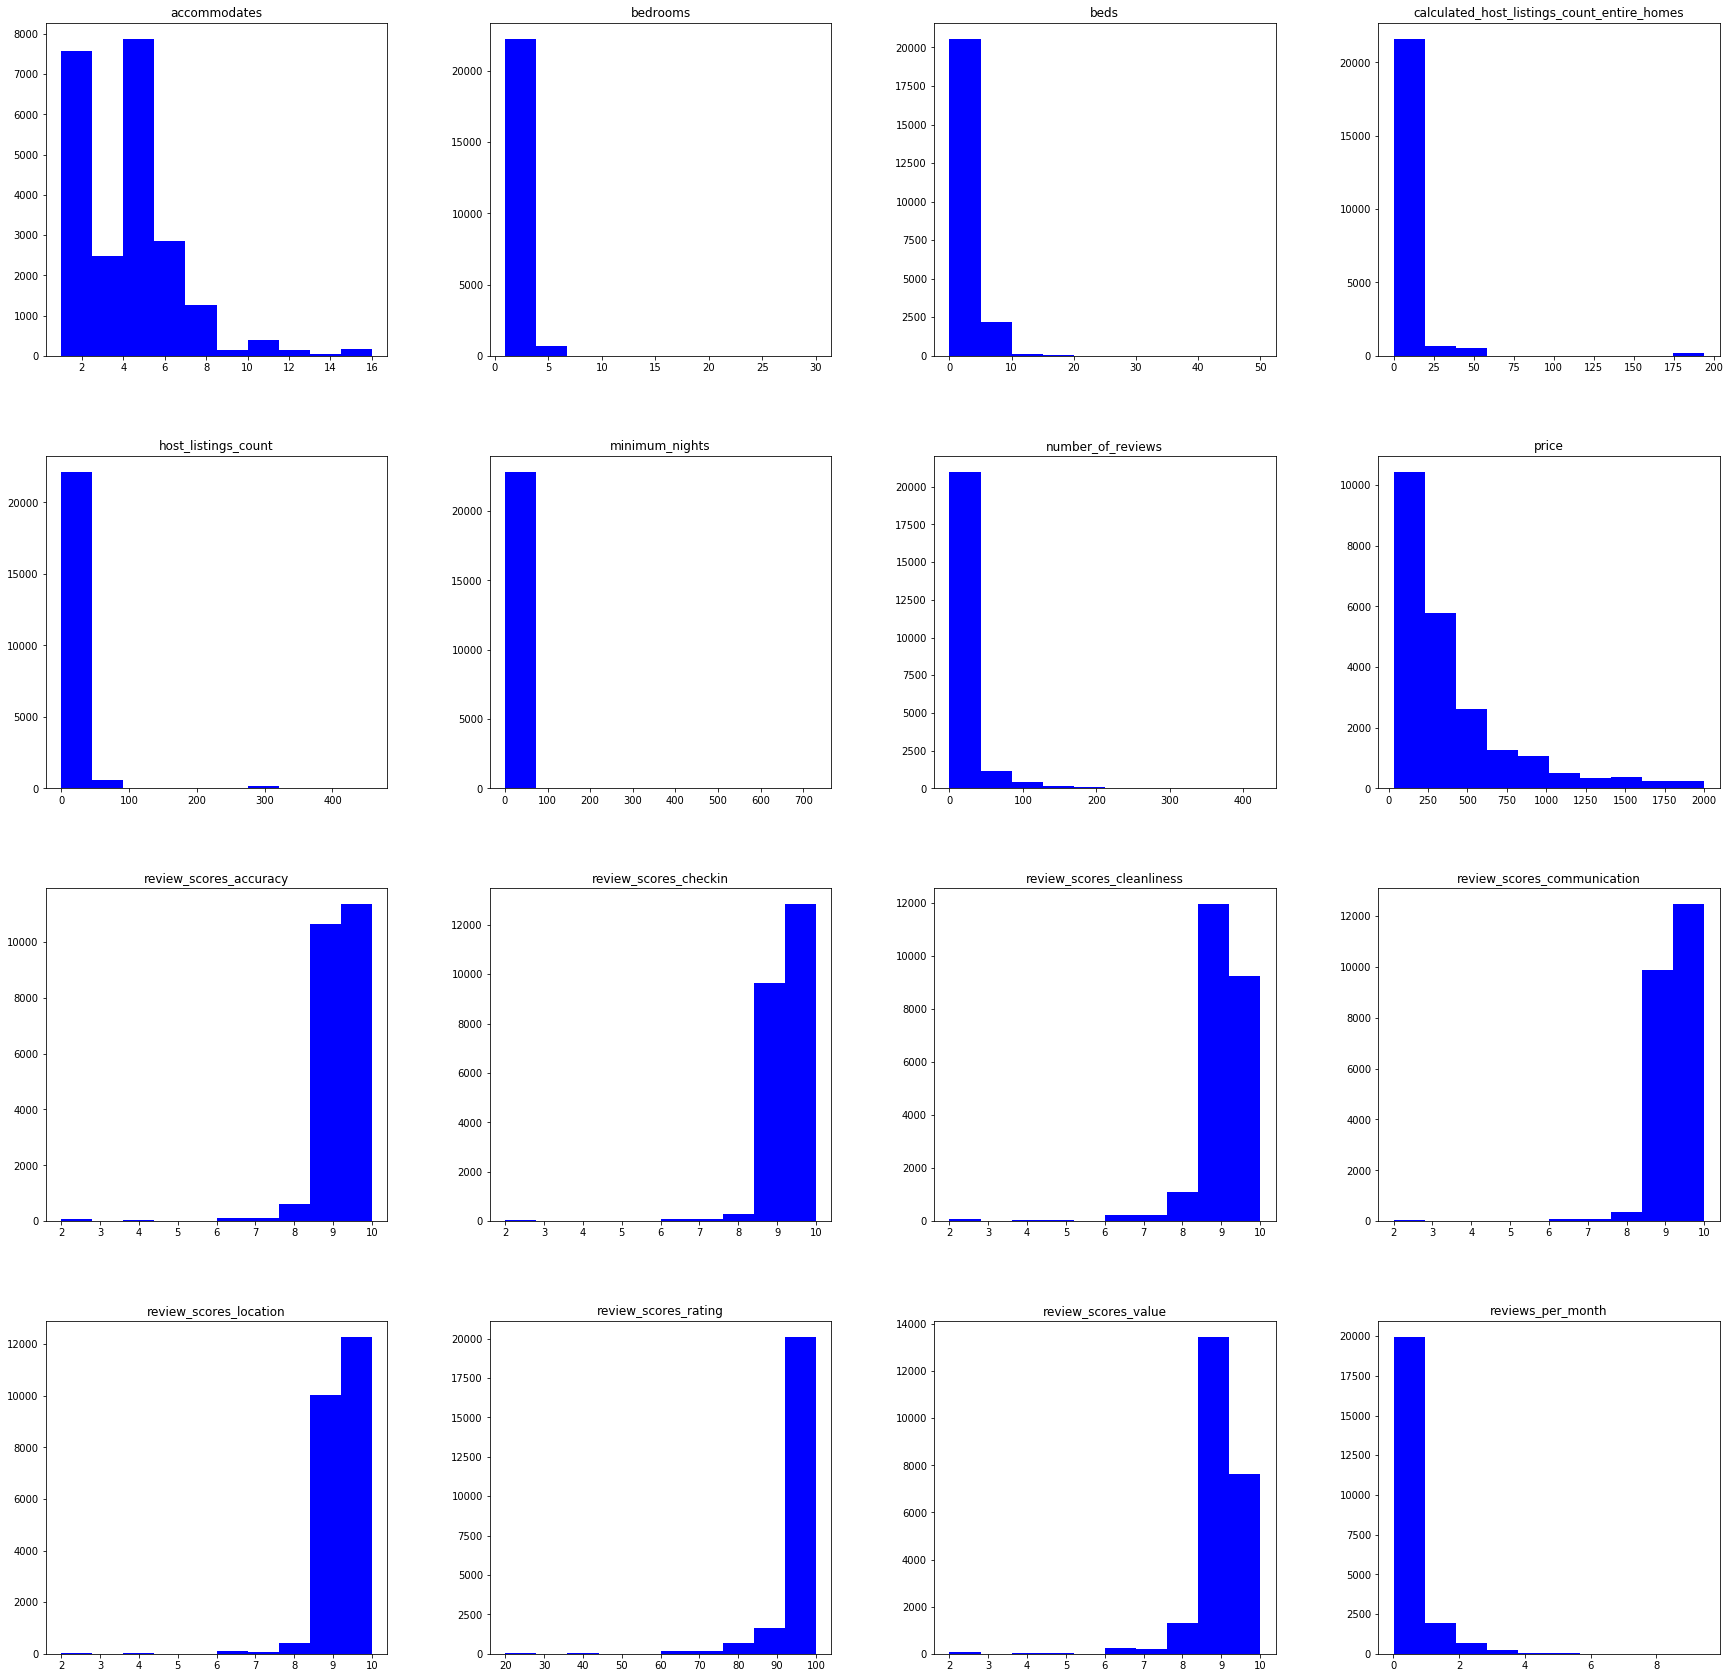

In [66]:
dados_numericos.hist(figsize = (30,30), grid = False, color ='blue')
plt.show()

In [67]:
# concatenando os dois DF:
dados = pd.concat([dados_categoricos, dados_numericos], axis=1, join='inner')

In [68]:
price_drop['room_type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

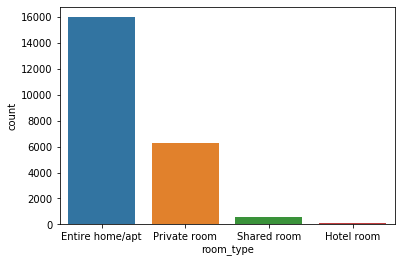

In [69]:
sns.countplot(x='room_type', data=price_drop)
plt.show()
# obs: aqui utilizei o dataframe price_drop porque foi antes da transformação das dummies.

In [70]:
soma_entire = sum((price_drop['room_type'] == 'Entire home/apt'))
soma_private = sum((price_drop['room_type'] == 'Private room'))
soma_shared = sum((price_drop['room_type'] == 'Shared room'))
soma_hotel = sum((price_drop['room_type'] == 'Hotel room'))
soma = price_drop['room_type'].count()

print(f"O percentual de imóveis inteiros é de {np.round ((soma_entire/soma) * 100, 2)}%.")
print(f"O percentual de quartos privados é de {np.round ((soma_private/soma) * 100, 2)}%.")
print(f"O percentual de quartos compartilhados é de {np.round ((soma_shared/soma) * 100, 2)}%.")
print(f"O percentual de quartos de hoteis é de {np.round ((soma_hotel/soma) * 100, 2)}%.")

O percentual de imóveis inteiros é de 69.6%.
O percentual de quartos privados é de 27.44%.
O percentual de quartos compartilhados é de 2.47%.
O percentual de quartos de hoteis é de 0.49%.


O gráfico em barras do 'room_type' mostra que apartamento/casa inteiro corresponde por boa parte dos anúncios (69.6%), sendo seguido por quarto privado (27.44%). Tanto quarto compartilhado (2.47%) como quarto de hotel (0.49%) representa uma proporção bem reduzida. Interessante que quarto inteiro tem mais que o dobro do segunto tipo mais disponível, ou seja, tem a maior ocorrência disparada.

In [71]:
acomodados = dados['accommodates'].unique().tolist()
acomodados.sort()

In [72]:
soma_1 = sum((dados['accommodates'] == 1))
soma_2 = sum((dados['accommodates'] == 2))
soma_3 = sum((dados['accommodates'] == 3))
soma_4 = sum((dados['accommodates'] == 4))
soma_5 = sum((dados['accommodates'] == 5))
soma_6 = sum((dados['accommodates'] == 6))
soma_7 = sum((dados['accommodates'] == 7))
soma_8 = sum((dados['accommodates'] == 8))
soma_9 = sum((dados['accommodates'] == 9))
soma_10 = sum((dados['accommodates'] == 10))
soma_11 = sum((dados['accommodates'] == 11))
soma_12 = sum((dados['accommodates'] == 12))
soma_13 = sum((dados['accommodates'] == 13))
soma_14 = sum((dados['accommodates'] == 14))
soma_15 = sum((dados['accommodates'] == 15))
soma_16 = sum((dados['accommodates'] == 16))
soma = dados['accommodates'].count()

print(f"O percentual de imóveis com uma acomodação é de {np.round ((soma_1/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com duas acomodações é de {np.round ((soma_2/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com três acomodações é de {np.round ((soma_3/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com quatro acomodações é de {np.round ((soma_4/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com cinco acomodações é de {np.round ((soma_5/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com seis acomodações é de {np.round ((soma_6/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com sete acomodações é de {np.round ((soma_7/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com oito acomodações é de {np.round ((soma_8/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com nove acomodações é de {np.round ((soma_9/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com dez acomodações é de {np.round ((soma_10/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com onze acomodações é de {np.round ((soma_11/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com doze acomodações é de {np.round ((soma_12/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com treze acomodações é de {np.round ((soma_13/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com catorze acomodações é de {np.round ((soma_14/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com quinze acomodações é de {np.round ((soma_15/soma) * 100, 2)}%.")
print(f"O percentual de imóveis com dezesseis acomodações é de {np.round ((soma_16/soma) * 100, 2)}%.")

O percentual de imóveis com uma acomodação é de 5.85%.
O percentual de imóveis com duas acomodações é de 27.18%.
O percentual de imóveis com três acomodações é de 10.76%.
O percentual de imóveis com quatro acomodações é de 26.7%.
O percentual de imóveis com cinco acomodações é de 7.61%.
O percentual de imóveis com seis acomodações é de 12.42%.
O percentual de imóveis com sete acomodações é de 2.15%.
O percentual de imóveis com oito acomodações é de 3.4%.
O percentual de imóveis com nove acomodações é de 0.62%.
O percentual de imóveis com dez acomodações é de 1.59%.
O percentual de imóveis com onze acomodações é de 0.17%.
O percentual de imóveis com doze acomodações é de 0.58%.
O percentual de imóveis com treze acomodações é de 0.09%.
O percentual de imóveis com catorze acomodações é de 0.14%.
O percentual de imóveis com quinze acomodações é de 0.16%.
O percentual de imóveis com dezesseis acomodações é de 0.58%.


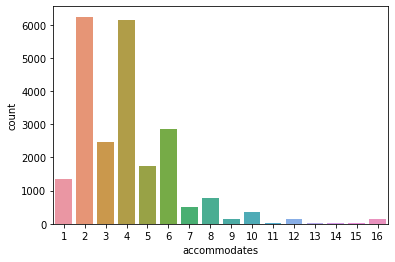

In [73]:
sns.countplot(x='accommodates', data=dados)
plt.show()

O gráfico em barras de 'accommodates' deixa claro que há picos nas contagem dos números pares, o que é natural, uma vez que as pessoas priorizam se hospedar em pares que sozinhas. Não apenas isso, os picos entre 2 e 4 acomodados são bem próximos, onde o percentual de acomodações para duas pessoas é de 27.18% e o com quatro de 26.7%. Já as acomodações que apresentaram menor percentual foram as seguintes: quinze (0.16%), catorze(0.14%) e treze (0.09%).

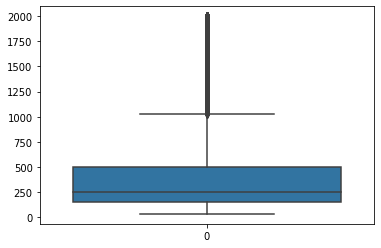

In [74]:
sns.boxplot(data=dados['price'])
plt.show()

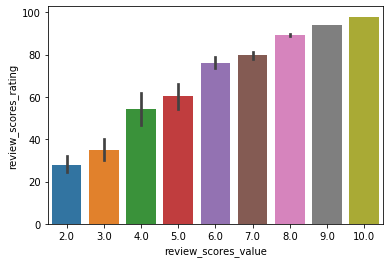

In [75]:
sns.barplot(dados.review_scores_value,dados.review_scores_rating)
plt.show()

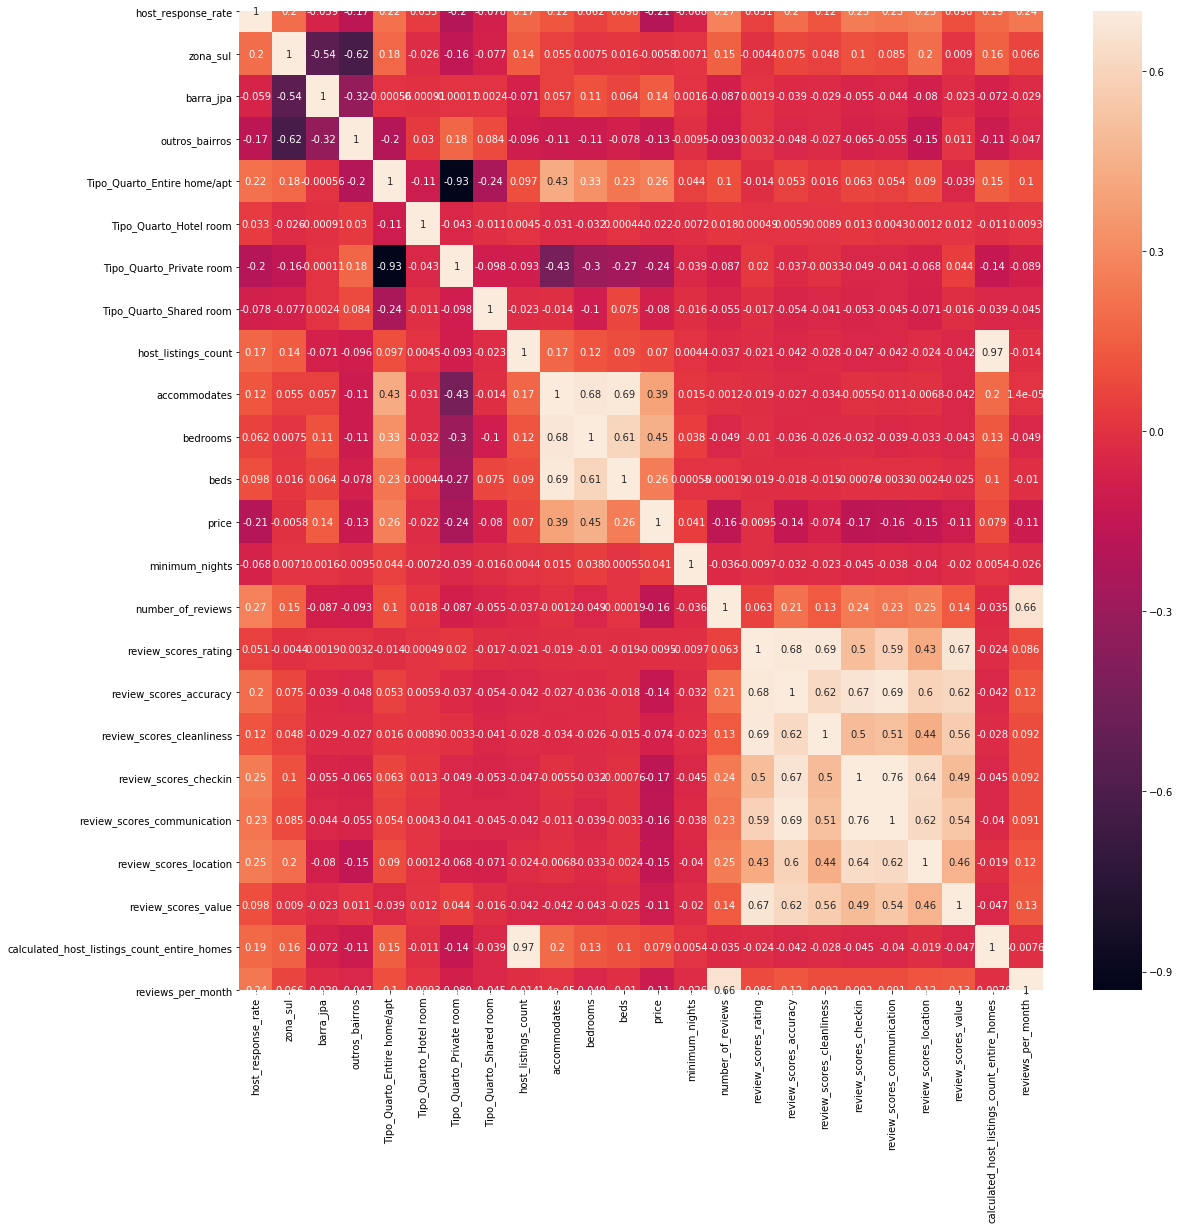

In [76]:
plt.figure(figsize=(18,18))
sns.heatmap(dados.corr(),vmax=.7,cbar=True,annot=True)
plt.show()

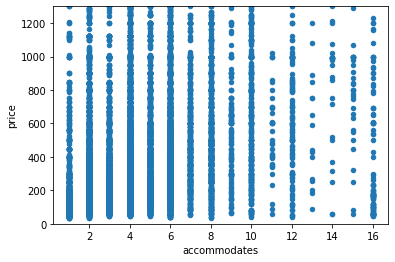

In [77]:
# gráfico de acomodação x preço
var = 'accommodates'
data = pd.concat([dados['price'], dados[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,1300));

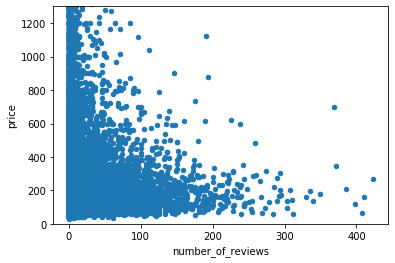

In [78]:
# número de review x preço
var = 'number_of_reviews'
data = pd.concat([dados['price'], dados[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,1300));

O gráfico de dispersão entre preço e número de avaliações apresenta as seguintes informações:
Primeiro ponto: nenhum imóvel com preço acima de 800,00 possui mais de 200 avaliações.
Segundo: preço e número de avaliações parecem se relacionar de forma inversa. Quanto maior o preço, menor é o número de avaliações.

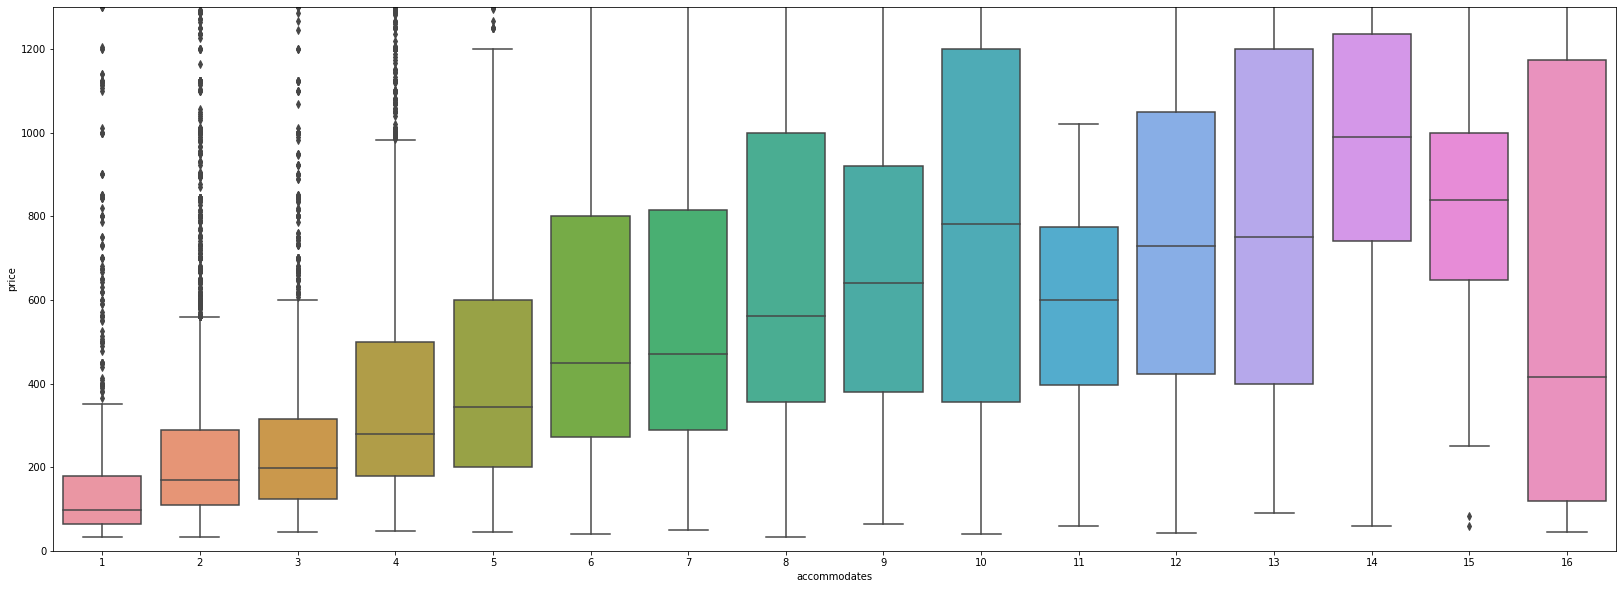

In [79]:
# acomodação x preço
var = 'accommodates'
data = pd.concat([dados['price'], dados[var]], axis=1)
f, ax = plt.subplots(figsize=(28, 10))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1300);

Análise bidimencional do preço e acomodações mostra alguns resultados: há outliers positivos entre 1 e 5 acomodados. Para os demais, somente com 15 apresentou outliers e nesse caso, negativo.

In [80]:
dados

,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,bathrooms_text,has_availability,instant_bookable,zona_sul,barra_jpa,outros_bairros,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,reviews_per_month
0,1.00,1,1,zona_sul,1,1,1,1,0,0,...,255,93.0,9.0,9.0,10.0,10.0,10.0,9.0,1,2.040000
1,1.00,0,1,zona_sul,2,1,0,1,0,0,...,94,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.150000
2,1.00,0,1,zona_sul,1,1,0,1,0,0,...,238,94.0,9.0,9.0,9.0,10.0,10.0,9.0,12,1.880000
3,1.00,0,1,zona_sul,1.5,1,0,1,0,0,...,181,94.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2.120000
4,0.93,1,1,zona_sul,1,1,0,1,0,0,...,339,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,1.00,0,1,zona_sul,1,1,0,1,0,0,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,3,0.573756
22951,1.00,0,1,outros_bairros,1,1,1,0,0,1,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,2,0.573756
22952,1.00,0,1,zona_sul,2,1,0,1,0,0,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,1,0.573756
22953,0.00,0,0,zona_sul,1,1,1,1,0,0,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,1,0.573756


In [83]:
zona_sul = sum(dados['neighbourhood_cleansed'] == 'zona_sul')
barra_jpa = sum(dados['neighbourhood_cleansed'] == 'barra_jpa')
outros_bairros = sum(dados['neighbourhood_cleansed'] == 'outros_bairros')
soma = dados['neighbourhood_cleansed'].count()

print(f"O percentual de bairros da zona sul é de {np.round ((zona_sul/soma) * 100, 2)}%.")
print(f"O percentual de bairros da barra e jacarepaguá é de {np.round ((barra_jpa/soma) * 100, 2)}%.")
print(f"O percentual dos demais bairros é de {np.round ((outros_bairros/soma) * 100, 2)}%.")

O percentual de bairros da zona sul é de 51.15%.
O percentual de bairros da barra e jacarepaguá é de 21.77%.
O percentual dos demais bairros é de 27.07%.


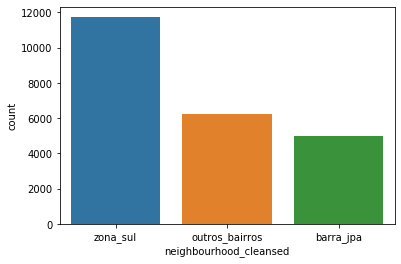

In [81]:
sns.countplot(x='neighbourhood_cleansed', data=dados)
plt.show()

A análise do agrupamento dos bairros mostra que mais da metade dos bairros listados estão na zona sul, com cerca de deproximadamente 51.15%. A segunda colocação ficou com os demais bairros, com percentual de 27.07% e por fim, Barra e Jararepaguá com 21.77%.

In [84]:
# fazendo o log do preço para a estimação:
dados['price'] = np.log(dados['price'])

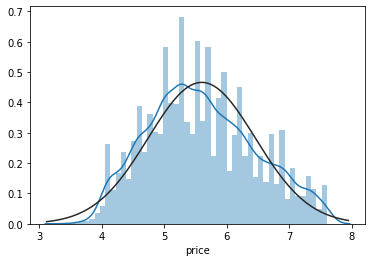

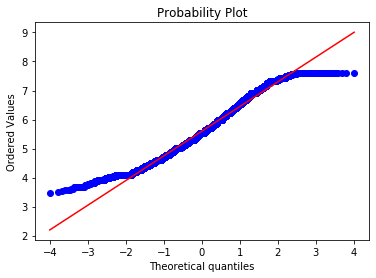

In [85]:
#transformed histogram and normal probability plot
sns.distplot(dados['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(dados['price'], plot=plt)

In [86]:
dados = dados.drop(['neighbourhood_cleansed'], axis = 1)

# Parte II: Modelagem

In [87]:
y = dados['price']

In [88]:
X = dados.drop('price', axis=1)
X

,host_response_rate,host_is_superhost,host_identity_verified,bathrooms_text,has_availability,instant_bookable,zona_sul,barra_jpa,outros_bairros,Tipo_Quarto_Entire home/apt,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,reviews_per_month
0,1.00,1,1,1,1,1,1,0,0,1,...,255,93.0,9.0,9.0,10.0,10.0,10.0,9.0,1,2.040000
1,1.00,0,1,2,1,0,1,0,0,1,...,94,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.150000
2,1.00,0,1,1,1,0,1,0,0,1,...,238,94.0,9.0,9.0,9.0,10.0,10.0,9.0,12,1.880000
3,1.00,0,1,1.5,1,0,1,0,0,1,...,181,94.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2.120000
4,0.93,1,1,1,1,0,1,0,0,1,...,339,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,1.00,0,1,1,1,0,1,0,0,1,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,3,0.573756
22951,1.00,0,1,1,1,1,0,0,1,1,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,2,0.573756
22952,1.00,0,1,2,1,0,1,0,0,1,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,1,0.573756
22953,0.00,0,0,1,1,1,1,0,0,1,...,0,94.0,9.0,9.0,9.0,9.0,9.0,9.0,1,0.573756


In [89]:
# separando os dados em treino e teste (30% para teste)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)

In [90]:
alphas = [0.000001, 0.00001, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1, 1]

In [91]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [92]:
# função que calcula o erro percentual absoluto
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

Fazendo cálculos dos modelos sem validação cruzada:

In [93]:
for a in alphas:
    model = Ridge(alpha=a, normalize=True).fit(X_train, y_train) 
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y) 
    print(f"Alpha:{a:.6f}, R2:{score:.3f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}")

Alpha:0.000001, R2:0.443, MSE:0.4129, RMSE:0.6426
Alpha:0.000010, R2:0.443, MSE:0.4129, RMSE:0.6426
Alpha:0.000100, R2:0.443, MSE:0.4129, RMSE:0.6426
Alpha:0.005000, R2:0.442, MSE:0.4129, RMSE:0.6426
Alpha:0.001000, R2:0.443, MSE:0.4129, RMSE:0.6426
Alpha:0.050000, R2:0.442, MSE:0.4140, RMSE:0.6434
Alpha:0.010000, R2:0.442, MSE:0.4130, RMSE:0.6427
Alpha:0.500000, R2:0.416, MSE:0.4351, RMSE:0.6596
Alpha:0.100000, R2:0.440, MSE:0.4158, RMSE:0.6448
Alpha:1.000000, R2:0.386, MSE:0.4585, RMSE:0.6771


In [94]:
for a in alphas:
    model = Lasso(alpha=a, normalize = True).fit((X_train), y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y) 
    print(f"Alpha:{a:.6f}, R2:{score:.3f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}")

Alpha:0.000001, R2:0.443, MSE:0.4129, RMSE:0.6426
Alpha:0.000010, R2:0.442, MSE:0.4131, RMSE:0.6427
Alpha:0.000100, R2:0.437, MSE:0.4192, RMSE:0.6475
Alpha:0.005000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.001000, R2:0.299, MSE:0.5210, RMSE:0.7218
Alpha:0.050000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.010000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.500000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.100000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:1.000000, R2:0.000, MSE:0.7366, RMSE:0.8582


In [95]:
for a in alphas:
    model = ElasticNet(alpha=a, normalize = True).fit((X_train), y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y) 
    print(f"Alpha:{a:.6f}, R2:{score:.3f}, MSE:{mse:.4f}, RMSE:{np.sqrt(mse):.4f}")

Alpha:0.000001, R2:0.442, MSE:0.4130, RMSE:0.6426
Alpha:0.000010, R2:0.441, MSE:0.4153, RMSE:0.6444
Alpha:0.000100, R2:0.392, MSE:0.4538, RMSE:0.6737
Alpha:0.005000, R2:0.004, MSE:0.7340, RMSE:0.8568
Alpha:0.001000, R2:0.138, MSE:0.6388, RMSE:0.7993
Alpha:0.050000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.010000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.500000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:0.100000, R2:0.000, MSE:0.7366, RMSE:0.8582
Alpha:1.000000, R2:0.000, MSE:0.7366, RMSE:0.8582


Com validação cruzada:

O alpha selecionado foi: 0.010000
O R2 do modelo foi de 43.9040, o MSE foi 0.4130 e a raiz quadrada do MSE 0.6427
A porcentagem média do erro absoluto foi de: 9.0744%
 
host_response_rate                            -0.452808
host_is_superhost                             -0.001685
host_identity_verified                        -0.083263
bathrooms_text                                 0.118908
has_availability                               0.000000
instant_bookable                              -0.077234
zona_sul                                       0.073340
barra_jpa                                      0.147246
outros_bairros                                -0.215884
Tipo_Quarto_Entire home/apt                    0.261019
Tipo_Quarto_Hotel room                         0.111042
Tipo_Quarto_Private room                      -0.203269
Tipo_Quarto_Shared room                       -0.636972
host_listings_count                            0.000584
accommodates                                   

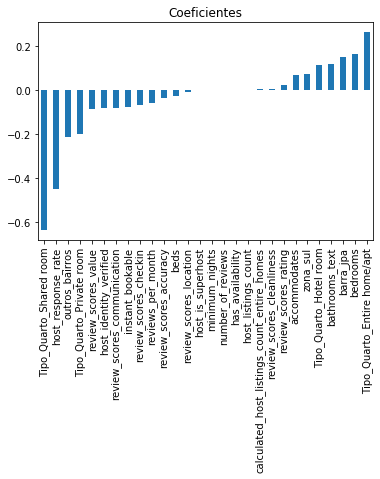

In [96]:
# Ridge com validação cruzada:
ridge_cv=RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_mod = ridge_cv.fit(X_train, y_train)


ypred = ridge_mod.predict(X_test)
score = ridge_mod.score(X_test, y_test)
score = r2_score(y_test,ypred)*100
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)


predictors = X_train.columns
coef = pd.Series(ridge_mod.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Coeficientes')

print(f"O alpha selecionado foi: {ridge_mod.alpha_:.6f}")
print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")
print(" ")
print(pd.Series(ridge_mod.coef_, index = X.columns))

O alpha selecionado foi: 0.000010
O R2 do modelo foi de 43.8892, o MSE foi 0.4131 e a raiz quadrada do MSE 0.6427
A porcentagem média do erro absoluto foi de: 9.0755%
 
host_response_rate                            -0.456722
host_is_superhost                             -0.000000
host_identity_verified                        -0.080647
bathrooms_text                                 0.117915
has_availability                               0.000000
instant_bookable                              -0.075506
zona_sul                                       0.000000
barra_jpa                                      0.072424
outros_bairros                                -0.288978
Tipo_Quarto_Entire home/apt                    0.463310
Tipo_Quarto_Hotel room                         0.295678
Tipo_Quarto_Private room                      -0.000000
Tipo_Quarto_Shared room                       -0.432374
host_listings_count                            0.000569
accommodates                                   

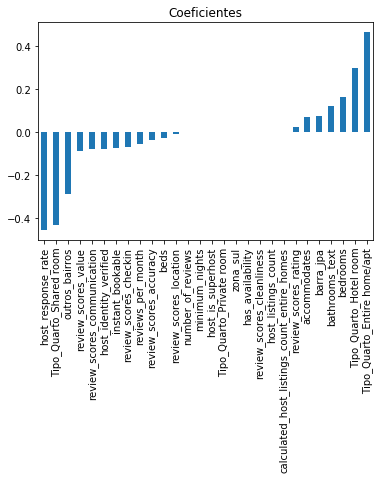

In [97]:
# lasso com validação cruzada:
lasso_cv = LassoCV(alphas = alphas, cv = 10, normalize = True)
lasso_mod = lasso_cv.fit(X_train, y_train)

ypred = lasso_mod.predict(X_test)
score = lasso_mod.score(X_test, y_test)
score = r2_score(y_test,ypred)*100
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)

predictors = X_train.columns
coef = pd.Series(lasso_mod.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Coeficientes')

print(f"O alpha selecionado foi: {lasso_mod.alpha_:.6f}")
print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")
print(" ")
print(pd.Series(lasso_mod.coef_, index = X.columns))

O alpha selecionado foi: 0.000001
O R2 do modelo foi de 43.9067, o MSE foi 0.4130 e a raiz quadrada do MSE 0.6426
A porcentagem média do erro absoluto foi de: 9.0735%
 
host_response_rate                            -0.453862
host_is_superhost                             -0.001124
host_identity_verified                        -0.083095
bathrooms_text                                 0.118880
has_availability                               0.000000
instant_bookable                              -0.077168
zona_sul                                       0.068593
barra_jpa                                      0.142519
outros_bairros                                -0.220874
Tipo_Quarto_Entire home/apt                    0.265236
Tipo_Quarto_Hotel room                         0.115038
Tipo_Quarto_Private room                      -0.199211
Tipo_Quarto_Shared room                       -0.633530
host_listings_count                            0.000586
accommodates                                   

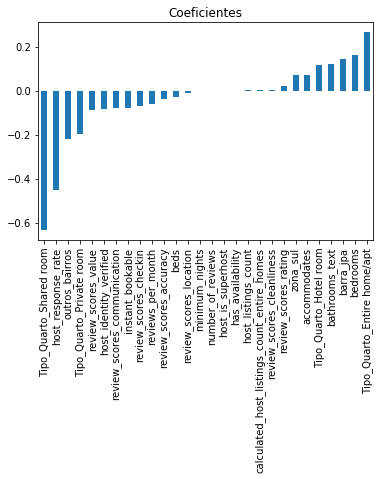

In [98]:
# elastic com validação cruzada:
elastic_cv = ElasticNetCV(alphas=alphas, cv=10, normalize = True)
elastic_cv_mod = elastic_cv.fit(X_train, y_train)


ypred = elastic_cv_mod.predict(X_test)
score = elastic_cv_mod.score(X_test, y_test)
score = r2_score(y_test,ypred)*100
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)

predictors = X_train.columns
coef = pd.Series(elastic_cv_mod.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Coeficientes')

print(f"O alpha selecionado foi: {elastic_cv_mod.alpha_:.6f}")
print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")
print(" ")
print(pd.Series(elastic_cv_mod.coef_, index = X.columns))

Ponto interessantes:
- Apesar do ElasticNet, Lasso e Ridge não apresentarem os melhores resultador, eles fornecem informações em relação aos coeficientes. Em todos eles, o coeficiente referente ao Tipo_Quarto_Entire home/apt apresentou maior impacto positivo. O coeficiente de bedrooms também apresentou forte variação positiva em relação ao preço em todos os estimadores.
- Já o coeficiente referente ao Tipo_Quarto_Shared room mostrou impactar de forma negativa esses três estimadores. host_response_rate também afetou de forma bem negativa todos os estimadores.
- Um coeficiente chama atenção em especial: barra_jpa. Em todos estimadores, esse coeficiente teve um efeito positivo e entre os bairros, foi o que apresentou maior impacto no preço quando analisado os bairros.

In [99]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)
rfr = regrRM2.fit(X_train, y_train)

ypred=regrRM2.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")

O R2 do modelo foi de 54.5271, o MSE foi 0.3348 e a raiz quadrada do MSE 0.5786
A porcentagem média do erro absoluto foi de: 7.9716%


In [100]:
mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)

In [101]:
df1 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(regrRM2.predict(X_test))})
df1.head(25)

,Actual,Predicted
18088,471.0,288.750033
3633,157.0,202.672134
6722,700.0,700.154314
6925,65.0,244.618002
5942,266.0,252.476346
4857,250.0,400.947068
12116,91.0,97.968955
17210,200.0,252.961174
7977,123.0,114.064912
17949,291.0,205.436289


In [102]:
clf = GradientBoostingRegressor(learning_rate = 0.2, max_depth =6, random_state = 42) #check the Gridsearch
scores = cross_val_score(clf ,  X_train , y_train , cv = 10, scoring = 'r2' )
print(scores)

clf.fit(X_train, y_train)

#dados = stnd.fit_transform(X_test) #Standard Scaling df_test
ypred = clf.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")

[0.56374484 0.5692809  0.56302142 0.58843531 0.57151508 0.59139769
 0.55700347 0.58121755 0.58644642 0.61150243]
O R2 do modelo foi de 56.5827, o MSE foi 0.3197 e a raiz quadrada do MSE 0.5654
A porcentagem média do erro absoluto foi de: 7.7719%


O modelo selecionado seria o do Gradient Boosting por dois motivos:
- apresentou maior R2: 56.58.
- teve menor porcentagem do erro absoluto: 7.77%

In [103]:
df1 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(ypred)})
df1.head(25)

,Actual,Predicted
18088,471.0,288.736438
3633,157.0,210.295415
6722,700.0,758.085071
6925,65.0,222.393906
5942,266.0,285.881098
4857,250.0,474.806708
12116,91.0,81.602812
17210,200.0,288.163239
7977,123.0,105.950178
17949,291.0,166.113927


In [104]:
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
scores = cross_val_score(regrRM2 , X_train , y_train , cv = 10, scoring = 'r2' )
regrRM2.fit(X_train, y_train)
print(scores)


ypred=regrRM2.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")

[0.54548295 0.56851652 0.55238659 0.56437361 0.5481573  0.58591047
 0.53542238 0.577999   0.57795551 0.60789618]
O R2 do modelo foi de 54.5081, o MSE foi 0.3349 e a raiz quadrada do MSE 0.5787
A porcentagem média do erro absoluto foi de: 7.9752%


In [105]:
df1 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(ypred)})
df1.head(25)

,Actual,Predicted
18088,471.0,286.789728
3633,157.0,204.621606
6722,700.0,674.645925
6925,65.0,226.217365
5942,266.0,265.164606
4857,250.0,414.953835
12116,91.0,96.260669
17210,200.0,246.948354
7977,123.0,117.871355
17949,291.0,216.727218


In [106]:
DTR = DecisionTreeRegressor(random_state=60)
scores = cross_val_score(DTR , X_train , y_train , cv = 10, scoring = 'r2' )
print(scores)


DTR.fit(X_train, y_train)

ypred=DTR.predict(X_test)

mse = mean_squared_error(y_test,ypred)
mape = mean_absolute_percentage_error(y_test,ypred)
score = r2_score(y_test,ypred)*100

print(f"O R2 do modelo foi de {score:.4f}, o MSE foi {mse:.4f} e a raiz quadrada do MSE {(np.sqrt(mse)):.4f}")
print(f"A porcentagem média do erro absoluto foi de: {mape:.4f}%")

[0.12332016 0.1617057  0.16881485 0.20792644 0.187391   0.16677391
 0.14413514 0.20696368 0.2003104  0.26217086]
O R2 do modelo foi de 14.0164, o MSE foi 0.6331 e a raiz quadrada do MSE 0.7957
A porcentagem média do erro absoluto foi de: 10.8335%


In [107]:
np.mean(scores)

0.18295121414267093

In [108]:
df1 = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': np.exp(ypred)})
df1.head(25)

,Actual,Predicted
18088,471.0,187.0
3633,157.0,110.0
6722,700.0,600.0
6925,65.0,199.0
5942,266.0,240.0
4857,250.0,179.0
12116,91.0,110.0
17210,200.0,170.0
7977,123.0,181.0
17949,291.0,400.0
